### Libraries

In [1]:
import sys
sys.path.append('../python-scripts')
from decision_tree_classifier import decision_tree_classifier

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data
The Iris dataset is some easily separable, "training-wheels" data. It will be very useful for testing a simple decision tree algorithm from scratch.

In [4]:
iris = load_iris()

In [5]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

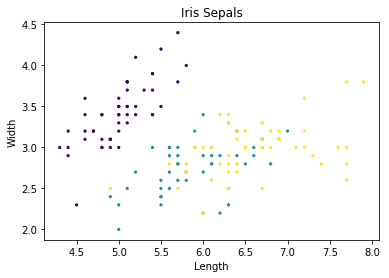

In [8]:
plt.scatter(features['sepal length (cm)'],
            features['sepal width (cm)'],
            c=iris.target, s=5)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris Sepals');

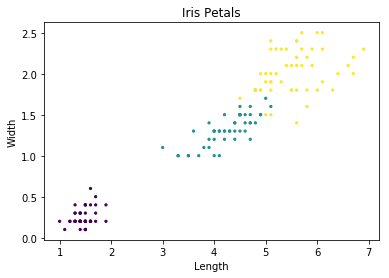

In [9]:
plt.scatter(features['petal length (cm)'],
            features['petal width (cm)'],
            c=iris.target, s=5)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris Petals');

### Decision Trees

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, iris.target)

#### Grow

In [18]:
dt = decision_tree_classifier(metric='entropy', repeat_features=True)
dt.fit(x_train, y_train)

In [19]:
dt.tree

{'feature_name': 'petal length (cm)',
 'gain': 0.9476077999667663,
 'left': 0,
 'right': {'feature_name': 'petal width (cm)',
  'gain': 0.7280240533703596,
  'left': {'feature_name': 'petal length (cm)',
   'gain': 0.180210923743582,
   'left': {'feature_name': 'petal width (cm)',
    'gain': 0.1792560669283215,
    'left': 1,
    'right': 2,
    'split_point': 1.7},
   'right': {'feature_name': 'petal width (cm)',
    'gain': 0.4199730940219749,
    'left': 2,
    'right': {'feature_name': 'sepal length (cm)',
     'gain': 0.9182958340544896,
     'left': 1,
     'right': 2,
     'split_point': 7.2000000000000002},
    'split_point': 1.6000000000000001},
   'split_point': 5.0},
  'right': 2,
  'split_point': 1.8},
 'split_point': 3.0}

#### Predict

In [21]:
pred = dt.predict(x_test)

In [22]:
accuracy_score(y_test, pred)

0.97368421052631582

### Compare to sklearn

In [23]:
sktree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
sktree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
sk_pred = sktree.predict(x_test)
accuracy_score(y_test, sk_pred)

0.97368421052631582